In [2]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [6]:
#reading the data
loan_data = pd.read_csv("loan1.csv")

In [4]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
loan_data.shape

(39717, 111)

In [8]:
loan_data.isnull().sum()


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [9]:
##Removing the columns with Null values 

In [18]:
loan_data.dropna(axis=1, how ="all", inplace=True)
loan_data.shape

(39717, 57)

In [20]:
loan_data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [21]:
## Dropping the columns which are not required for analysis
We have 57 columns and all 57 columns are not required for analysis
Few of the columns like "address", "id", "member id", "url", "zip_code", "title" etc are irrelevent
Few of the columns are related to post approval of loan
All these columns can be safely removed before proceeding with the analysis



In [22]:
print(loan_data.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [91]:
loan_data.drop(['id','member_id','url', 'desc','title', 'zip_code', 'addr_state','last_pymnt_d', 'last_pymnt_amnt','next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med','policy_code','tax_liens'], axis=1, inplace=True)


In [29]:
loan_data.shape
loan_data.columns


Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')

In [30]:
loan_data.shape

(39717, 41)

In [35]:
##Further analysing the columns which might be required for the analysis on the features for loan Default
Going throgh the data set and researching on domain, we found that columns such as 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
'term', 'int_rate','installment', 'home_ownership', 'annual_inc', 'verification_status','total_pymnt'and 'total_acc' contribute
much to the analysis based on which we can find the features of Default customers. So removing rest of the columns.

In [36]:
loan_data.drop([
       'grade', 'sub_grade', 'emp_title',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'initial_list_status', 'out_prncp', 'out_prncp_inv','total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
        'recoveries', 'collection_recovery_fee',
       'acc_now_delinq', 'delinq_amnt',
       ], axis=1, inplace=True)

In [37]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amnt                 39717 non-null  int64  
 1   funded_amnt               39717 non-null  int64  
 2   funded_amnt_inv           39717 non-null  float64
 3   term                      39717 non-null  object 
 4   int_rate                  39717 non-null  object 
 5   installment               39717 non-null  float64
 6   emp_length                38642 non-null  object 
 7   home_ownership            39717 non-null  object 
 8   annual_inc                39717 non-null  float64
 9   verification_status       39717 non-null  object 
 10  issue_d                   39717 non-null  object 
 11  loan_status               39717 non-null  object 
 12  pymnt_plan                39717 non-null  object 
 13  total_acc                 39717 non-null  int64  
 14  total_

In [39]:
#Now we found that there are 2 columns "chargeoff_within_12_mths","emp_length"and "pub_rec_bankruptcies". 
##So lets check and work on the null values

In [41]:
loan_data.isnull().sum().sort_values(ascending=False)

emp_length                  1075
pub_rec_bankruptcies         697
chargeoff_within_12_mths      56
issue_d                        0
total_rec_late_fee             0
total_pymnt                    0
total_acc                      0
pymnt_plan                     0
loan_status                    0
loan_amnt                      0
funded_amnt                    0
annual_inc                     0
home_ownership                 0
installment                    0
int_rate                       0
term                           0
funded_amnt_inv                0
verification_status            0
dtype: int64

In [42]:
# Checking values in emp_length columns for feasibility of inserting null values
loan_data.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [43]:
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0], inplace = True)
loan_data.emp_length.isnull().sum()

0

In [44]:
# Checking values in emp_length columns for feasibility of inserting null values
loan_data.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [45]:
##As for the column 'pub_rec_bankruptcies', the data mostly has value 0 which can be subsitued in place of null as that 
##will have no impact on the analysis.



In [46]:
loan_data.pub_rec_bankruptcies.fillna(0, inplace = True)
loan_data.pub_rec_bankruptcies.isnull().sum()

0

In [47]:
loan_data.isnull().sum()

loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
emp_length                   0
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
pymnt_plan                   0
total_acc                    0
total_pymnt                  0
total_rec_late_fee           0
chargeoff_within_12_mths    56
pub_rec_bankruptcies         0
dtype: int64

In [48]:
loan_data.chargeoff_within_12_mths.value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [49]:
#Since 39661 rows have unique values, this column can be removed instead of working on null values

In [50]:
loan_data.drop("chargeoff_within_12_mths", axis=1, inplace=True)

In [52]:
loan_data.isnull().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
pymnt_plan              0
total_acc               0
total_pymnt             0
total_rec_late_fee      0
pub_rec_bankruptcies    0
dtype: int64

In [53]:
##The goal of the analysis is to see who is likely to default and this can only be said in case of either fully paid or charged off loans.
We cannot make anything up for the current loans.
To exclude that data , removing the records with current loan status

In [59]:
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [60]:
loan_data=loan_data[loan_data.loan_status!="Current"]

In [61]:
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [62]:
## Standardizing the columns "emp_length" and "int_rate" columns

In [63]:
loan_data.int_rate = pd.to_numeric(loan_data.int_rate.apply(lambda x : x.split('%')[0]))

In [64]:
loan_data.emp_length = pd.to_numeric(loan_data.emp_length.apply(lambda x : 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [65]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,total_acc,total_pymnt,total_rec_late_fee,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,10,RENT,24000.0,Verified,Dec-11,Fully Paid,n,9,5863.155187,0.00,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,4,1008.710000,0.00,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,10,3005.666844,0.00,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,37,12231.890000,16.97,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,12,5632.210000,0.00,0.0


In [66]:
#Now that the data is clean and standardized, lets dive into every column and remove the outliers.

<AxesSubplot:xlabel='annual_inc'>

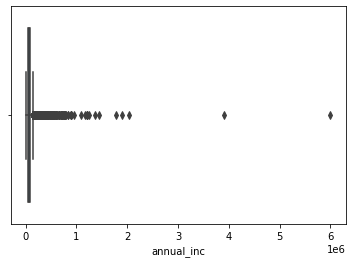

In [69]:
sns.boxplot(loan_data["annual_inc"])

In [71]:
##The box plot clearly indicates the presence of outliers and seems to be above 95th percentile.
#Taking the quantile of 95 percentile as threshold to remove the outliers

In [73]:
quantile_info = loan_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [77]:
annual_inc_95perc = loan_data.annual_inc.quantile(0.95)

<AxesSubplot:xlabel='annual_inc'>

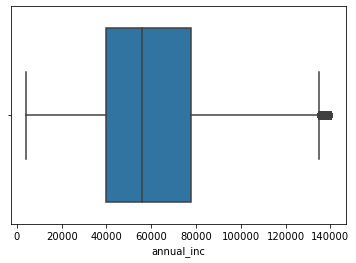

In [79]:
loan_data= loan_data[loan_data.annual_inc<=annual_inc_95perc]
sns.boxplot(loan_data.annual_inc)

<AxesSubplot:xlabel='loan_amnt'>

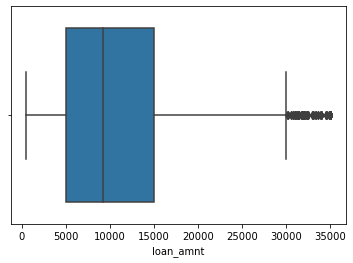

In [80]:
sns.boxplot(loan_data['loan_amnt'])

<AxesSubplot:xlabel='funded_amnt'>

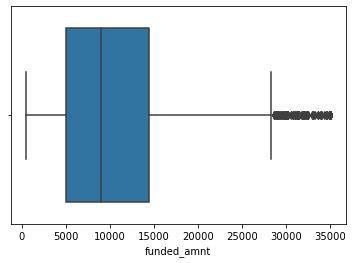

In [82]:
sns.boxplot(loan_data['funded_amnt'])

<AxesSubplot:xlabel='loan_amnt'>

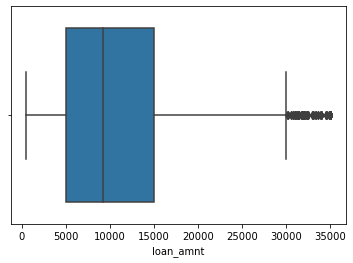

In [83]:
sns.boxplot(loan_data['loan_amnt'])

<AxesSubplot:xlabel='funded_amnt_inv'>

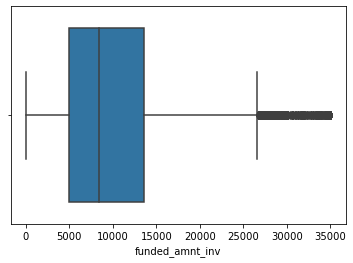

In [84]:
sns.boxplot(loan_data['funded_amnt_inv'])

In [92]:
##Although some outliers could be seen in a few required numerical data , they are not significant and disturbation seem to be even
#Going ahead with analysis of categorical variables.

<AxesSubplot:xlabel='loan_status', ylabel='count'>

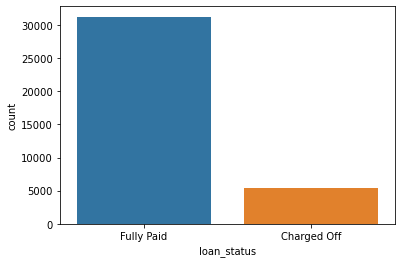

In [93]:
sns.countplot(loan_data['loan_status'])

In [94]:
##From the above graph its clear that the count of 'fully paid' is high and the 'charged off' ones are considerably low.

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

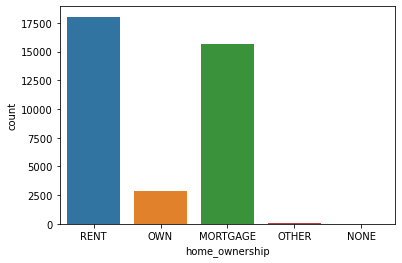

In [95]:
sns.countplot(loan_data['home_ownership'])

In [96]:
##Here we see that rows with 'NONE' value is almost 0. So we can replace these values by 'OTHER'

In [97]:
loan_data.home_ownership.replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [98]:
##Checking the unique values now
loan_data.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [99]:
##NONE value is now not seen and can be proceeded with analysis considering 'Charged Off' loan Status.

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

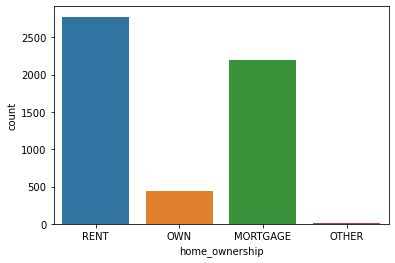

In [104]:
sns.countplot(x='home_ownership',data = loan_data[loan_data.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='term', ylabel='count'>

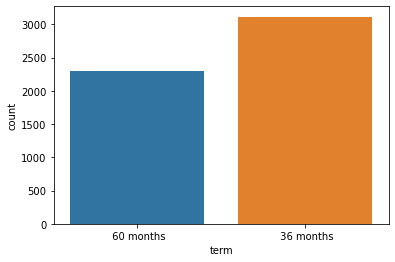

In [106]:
##Analysing based on "term" column
sns.countplot(x='term', data=loan_data[loan_data.loan_status =='Charged Off'])

<AxesSubplot:xlabel='verification_status', ylabel='count'>

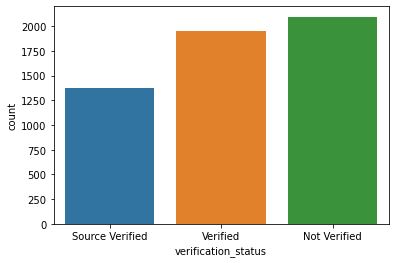

In [107]:
##Analysing based on "verification_status" column
sns.countplot(x='verification_status', data=loan_data[loan_data.loan_status =='Charged Off'])

In [111]:
loan_data.installment.sort_values(ascending=False)

12140    1305.19
16152    1302.69
7988     1288.10
11670    1288.10
15050    1272.20
          ...   
39397      16.47
39275      16.31
39373      16.25
38863      16.08
39544      15.69
Name: installment, Length: 36654, dtype: float64

In [112]:
# From above data we see that the installments are between minimum of 15.69 and maximum being 1305. Creating the bins to analyse further
loan_data['installment_bin'] = pd.cut(loan_data['installment'], bins=5,precision =0,labels=['0-200','200-500','500-800','800-1000','1000-1400'])

In [113]:
#Similarly creating bins for other variables 
loan_data['int_rate_bin'] = pd.cut(loan_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_data['total_acc_bin'] = pd.cut(loan_data['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan_data['annual_inc_bin'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [114]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,...,loan_status,pymnt_plan,total_acc,total_pymnt,total_rec_late_fee,pub_rec_bankruptcies,installment_bin,int_rate_bin,total_acc_bin,annual_inc_bin
0,5000,5000,4975.0,36 months,10.65,162.87,10,RENT,24000.0,Verified,...,Fully Paid,n,9,5863.155187,0.00,0.0,0-200,9%-13%,2-20,3k-31k
1,2500,2500,2500.0,60 months,15.27,59.83,0,RENT,30000.0,Source Verified,...,Charged Off,n,4,1008.710000,0.00,0.0,0-200,13%-17%,2-20,3k-31k
2,2400,2400,2400.0,36 months,15.96,84.33,10,RENT,12252.0,Not Verified,...,Fully Paid,n,10,3005.666844,0.00,0.0,0-200,13%-17%,2-20,3k-31k
3,10000,10000,10000.0,36 months,13.49,339.31,10,RENT,49200.0,Source Verified,...,Fully Paid,n,37,12231.890000,16.97,0.0,200-500,13%-17%,20-37,31k-58k
5,5000,5000,5000.0,36 months,7.90,156.46,3,RENT,36000.0,Source Verified,...,Fully Paid,n,12,5632.210000,0.00,0.0,0-200,5%-9%,2-20,31k-58k


In [115]:
loan_data.emp_length.sort_values(ascending=False)

0        10
13625    10
13592    10
13595    10
13598    10
         ..
16269     0
16261     0
6131      0
16257     0
39716     0
Name: emp_length, Length: 36654, dtype: int64

In [116]:
loan_data.emp_length.unique()

array([10,  0,  3,  8,  9,  4,  5,  1,  6,  2,  7], dtype=int64)

In [118]:
#We have emp_length values ranging from 0 to 10, creating bins for these as well
loan_data['emp_length_bin'] = pd.cut(loan_data['emp_length'], bins=3,precision =0,labels =['0-3','3-6','6-10'])

In [119]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,...,pymnt_plan,total_acc,total_pymnt,total_rec_late_fee,pub_rec_bankruptcies,installment_bin,int_rate_bin,total_acc_bin,annual_inc_bin,emp_length_bin
0,5000,5000,4975.0,36 months,10.65,162.87,10,RENT,24000.0,Verified,...,n,9,5863.155187,0.00,0.0,0-200,9%-13%,2-20,3k-31k,6-10
1,2500,2500,2500.0,60 months,15.27,59.83,0,RENT,30000.0,Source Verified,...,n,4,1008.710000,0.00,0.0,0-200,13%-17%,2-20,3k-31k,0-3
2,2400,2400,2400.0,36 months,15.96,84.33,10,RENT,12252.0,Not Verified,...,n,10,3005.666844,0.00,0.0,0-200,13%-17%,2-20,3k-31k,6-10
3,10000,10000,10000.0,36 months,13.49,339.31,10,RENT,49200.0,Source Verified,...,n,37,12231.890000,16.97,0.0,200-500,13%-17%,20-37,31k-58k,6-10
5,5000,5000,5000.0,36 months,7.90,156.46,3,RENT,36000.0,Source Verified,...,n,12,5632.210000,0.00,0.0,0-200,5%-9%,2-20,31k-58k,0-3


In [120]:
#Now lets analyse and create bins for rest of numerical variables
loan_data.loan_amnt.sort_values()

39544      500
39397      500
39275      500
39373      500
38863      500
         ...  
3965     35000
12513    35000
7424     35000
7440     35000
12412    35000
Name: loan_amnt, Length: 36654, dtype: int64

In [122]:
#We see that the loan_amnt ranges between 500 and 35000, lets now create bins of it.
loan_data['loan_amnt_bin'] = pd.cut(loan_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])

In [125]:
##Similarly for funded_amnt_inv columns 
loan_data.funded_amnt_inv.sort_values()

38474        0.0
38606        0.0
38504        0.0
38605        0.0
38604        0.0
          ...   
3703     35000.0
10651    35000.0
17923    35000.0
12905    35000.0
5180     35000.0
Name: funded_amnt_inv, Length: 36654, dtype: float64

In [146]:
#We see that the loan_amnt ranges between 0 and 35000, lets now create bins of it.
loan_data['funded_amnt_inv_group'] = pd.cut(loan_data['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) 

In [147]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,...,total_pymnt,total_rec_late_fee,pub_rec_bankruptcies,installment_bin,int_rate_bin,total_acc_bin,annual_inc_bin,emp_length_bin,loan_amnt_bin,funded_amnt_inv_group
0,5000,5000,4975.0,36 months,10.65,162.87,10,RENT,24000.0,Verified,...,5863.155187,0.00,0.0,0-200,9%-13%,2-20,3k-31k,6-10,0-5k,0-5k
1,2500,2500,2500.0,60 months,15.27,59.83,0,RENT,30000.0,Source Verified,...,1008.710000,0.00,0.0,0-200,13%-17%,2-20,3k-31k,0-3,0-5k,0-5k
2,2400,2400,2400.0,36 months,15.96,84.33,10,RENT,12252.0,Not Verified,...,3005.666844,0.00,0.0,0-200,13%-17%,2-20,3k-31k,6-10,0-5k,0-5k
3,10000,10000,10000.0,36 months,13.49,339.31,10,RENT,49200.0,Source Verified,...,12231.890000,16.97,0.0,200-500,13%-17%,20-37,31k-58k,6-10,5k-10k,5k-10k
5,5000,5000,5000.0,36 months,7.90,156.46,3,RENT,36000.0,Source Verified,...,5632.210000,0.00,0.0,0-200,5%-9%,2-20,31k-58k,0-3,0-5k,0-5k


<AxesSubplot:xlabel='installment_bin', ylabel='count'>

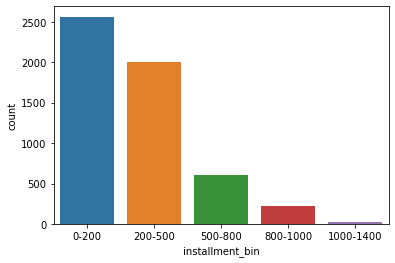

In [149]:
sns.countplot(x='installment_bin', data=loan_data[loan_data.loan_status =='Charged Off'])

In [150]:
##Conclusion
#The customers having monthly installments in the range 0 to 500 are seen to be Defaulted more comparably

Text(0.5, 0, 'Interest Rate')

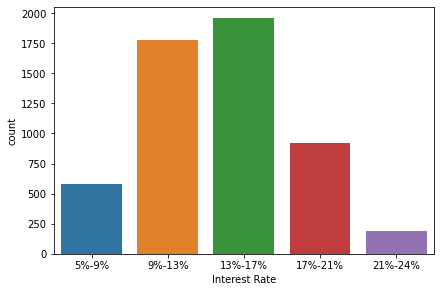

In [151]:
##Analysing interest rate column
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_bin', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')

In [152]:
##Conclusion
#The customers having interest between 9% to 17% are seen to be Defaulted

Text(0.5, 0, 'Annual Income')

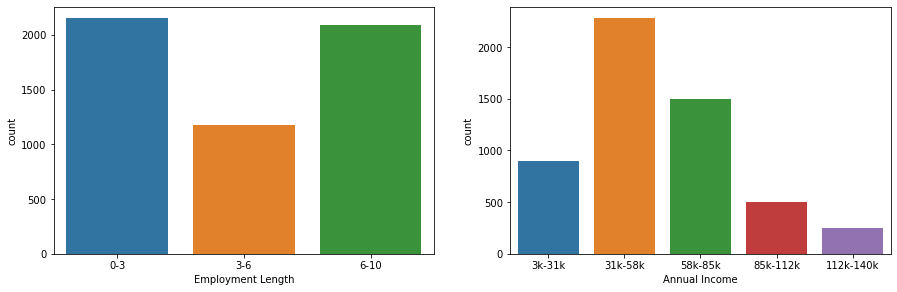

In [154]:
##Analysis of column "emp_length" and "annual_inc"
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='emp_length_bin', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Employment Length')
plt.subplot(222)
sns.countplot(x='annual_inc_bin', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Annual Income')

In [155]:
##Conclusion
#The customers have employment length in the range 0 to 3 years and 6 to 10 years are seen to be defaulted more.
#The customers with teh annual income between 30k to 85k seem to be defaulted as well


Text(0.5, 0, 'Inv Funded Amount')

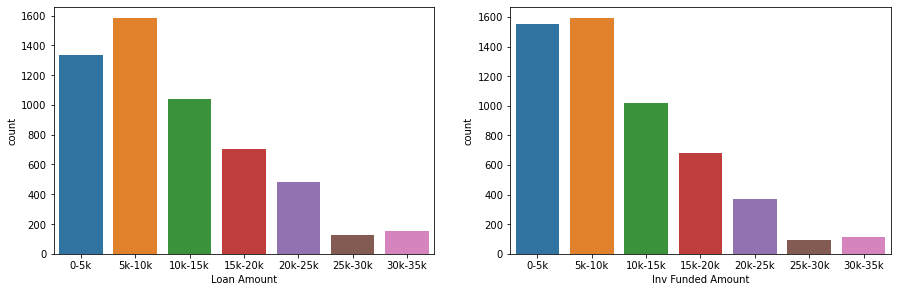

In [157]:
##Analysis of column "loan_amnt" and "funded_amnt_inv" using the created bins
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='loan_amnt_bin', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Loan Amount')
plt.subplot(222)
sns.countplot(x='funded_amnt_inv_group', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Inv Funded Amount')

In [158]:
##Conclusion
#CUstomers with loan amount sanctioned between 5k to 10k are seen to be Defaulted more. 
#Analysing further we also see that customers with loan amout of 0 to 5k and 10k to 15k have also defaulted.
# With loan amount between 15k to 25k have defaulted comparably low but cant be ignored
# similarly analysing Funded Amount by Investors we can come to a conclusion that range 0 to 10k must be taken into account 
#customers with having funded amount between 10k to 15k should also be observed to an extent


Text(0.5, 0, 'Home Ownership')

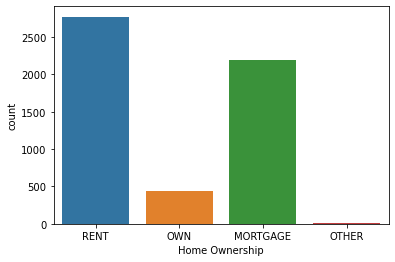

In [159]:
## Similarly lets analyse for "term", "home_ownership" and "verification_status"
sns.countplot(x="home_ownership", data = loan_data[loan_data.loan_status == "Charged Off"])
plt.xlabel("Home Ownership")

Text(0.5, 0, 'verification status')

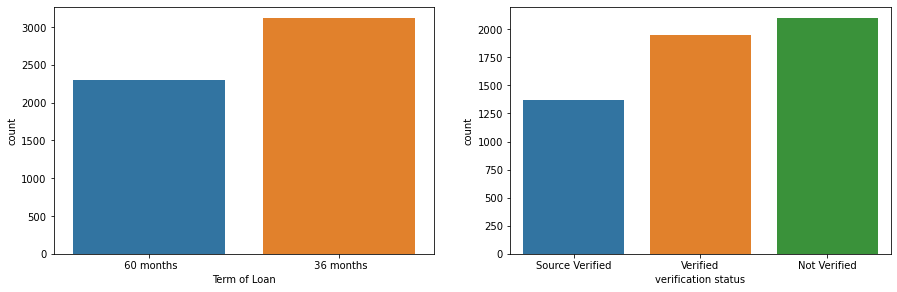

In [160]:
# Analysis wrt "term" and "verification_status"
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='term', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Term of Loan')
plt.subplot(222)
sns.countplot(x='verification_status', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('verification status')

In [161]:
## Conclusion
#The non verified customers and with 36 months of loan term default more
# Also people having rented house and with Mortgage Default more

In [177]:
#Analysis on the basis of issued month and year
temp_mon_yr = loan_data.issue_d.str.partition('-',True)
loan_data['issue_month'] = temp_mon_yr[0]
loan_data['issue_year'] = '20'+ temp_mon_yr[2]

In [178]:
loan_data.shape

(36654, 26)

In [173]:
loan_data.issue_year

0        2011
1        2011
2        2011
3        2011
5        2011
         ... 
39711    2007
39712    2007
39713    2007
39714    2007
39716    2007
Name: 2, Length: 36654, dtype: object

In [174]:
#Now the issue month and issue year are formatted as per requirement. So lets analyse further

<AxesSubplot:xlabel='issue_month', ylabel='count'>

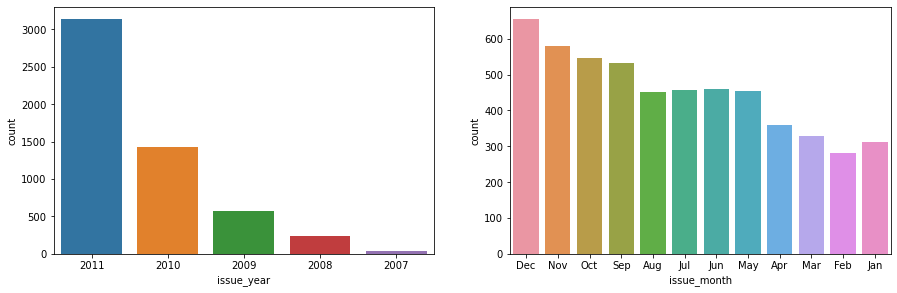

In [181]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='issue_year', data = loan_data[loan_data.loan_status == "Charged Off"])
plt.subplot(222)
sns.countplot(x='issue_month', data = loan_data[loan_data.loan_status == "Charged Off"])

In [182]:
#With above analysis we can conclude that customers who have been sanctioned the loan in the year 2011 and month Dec Default more

In [183]:
##Observations

##As per the analysis, there is a probability of more defaulting with the below features
# 1)Customers with monthly installment ranging from "0 to 500" are seen to be Defaulted more comparably
#2)The customers having interest between "9% to 17%"" are seen to be Defaulted
#3)The customers have employment length in the range "0 to 3 years and 6 to 10 years" are seen to be defaulted more.
#4)The customers with teh annual income between "30k to 85k" seem to be defaulted as well
#5)Customers with loan amount sanctioned between "5k to 10k" are seen to be Defaulted more. 
#6)Analysing further we also see that customers with loan amout of "0 to 5k and 10k to 15k" have also defaulted.
#7) With loan amount between 15k to 25k have defaulted comparably low but cant be ignored
#8) similarly analysing Funded Amount by Investors we can come to a conclusion that range "0 to 10k" must be taken into account 
#9)customers with having funded amount between 10k to 15k should also be observed to an extent
#10)The "non verified" customers and with "36 months" of loan term default more
#11) Also people having rented house and with Mortgage Default more
#12)With above analysis we can conclude that customers who have been sanctioned the loan in the year "2011" and month "Dec" Default more

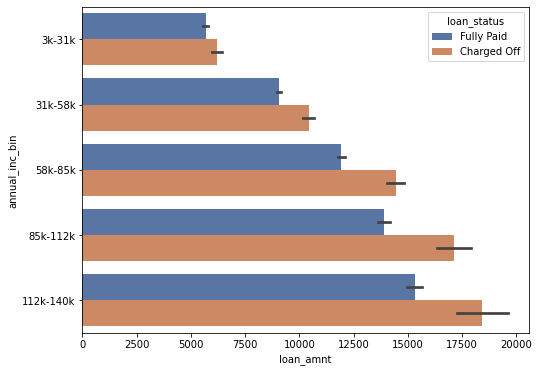

In [190]:
#Analysing the loan_amnt with other columns for more insights
#'loan_amnt' and 'term'
plt.figure(figsize=(8,6))
sns.barplot(data =loan_data,x='loan_amnt', y='annual_inc_bin', hue ='loan_status',palette="deep")
plt.show()

In [186]:
##Conclusion 
# The applicants who are in the annual income bin of 112k to 140k with the loan amount between 17000 and 20000 are defaulted more

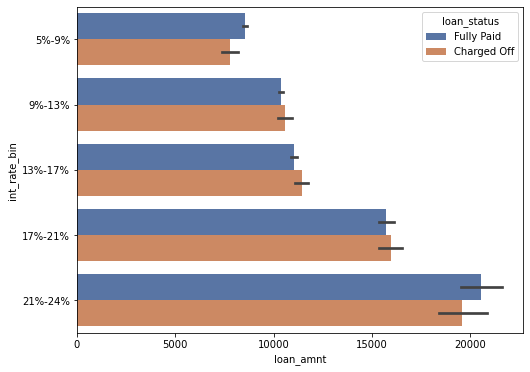

In [189]:
#'loan_amnt' and 'int_rate'
plt.figure(figsize=(8,6))
sns.barplot(data =loan_data,x='loan_amnt', y='int_rate_bin', hue ='loan_status',palette="deep")
plt.show()

In [191]:
##Conclusion 
# The applicants with the interest rate of 21% to 24% with the loan amount of nearly 20k are likely to default

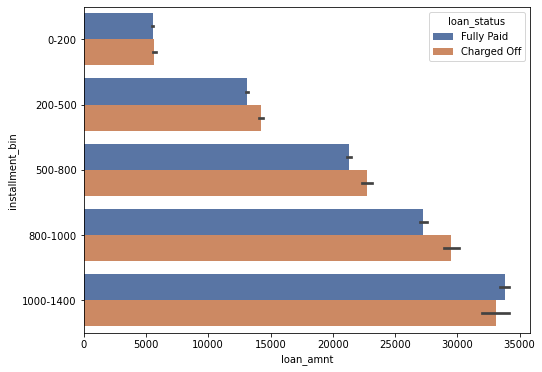

In [192]:
#'loan_amnt' and 'installment'
plt.figure(figsize=(8,6))
sns.barplot(data =loan_data,x='loan_amnt', y='installment_bin', hue ='loan_status',palette="deep")
plt.show()

In [193]:
##Conclusion
# The applicants having the installment of 1000 to 1400 with loan amount of nearly 35k default more

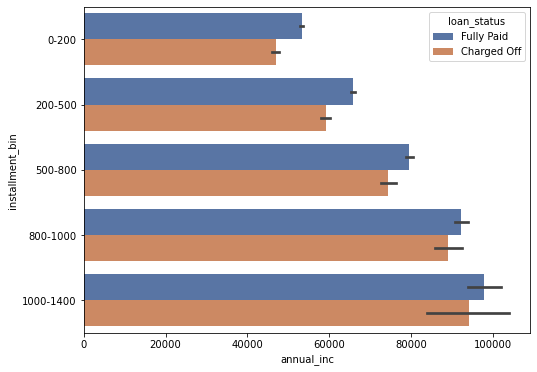

In [194]:
## Now lets analyse different attributes with respect to annual income
#annual_inc and installment
plt.figure(figsize=(8,6))
sns.barplot(data =loan_data,x='annual_inc', y='installment_bin', hue ='loan_status',palette="deep")
plt.show()

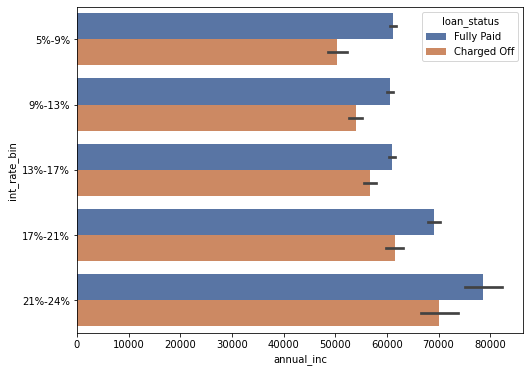

In [195]:
#annual_inc and interest rate 
plt.figure(figsize=(8,6))
sns.barplot(data =loan_data,x='annual_inc', y='int_rate_bin', hue ='loan_status',palette="deep")
plt.show()

In [196]:
##COnclusion
# The applicants having the annual income of around 70k with interest rate of 21 to 24% are likely to default

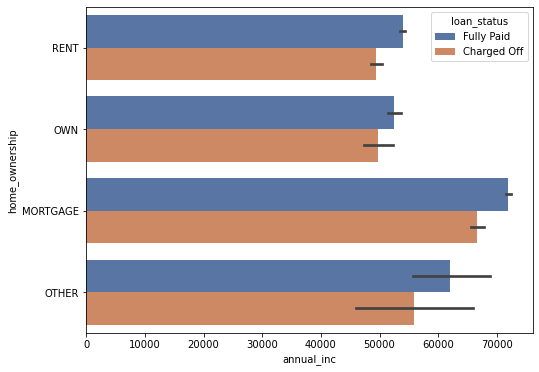

In [197]:
#annual_inc and home ownership
plt.figure(figsize=(8,6))
sns.barplot(data =loan_data,x='annual_inc', y='home_ownership', hue ='loan_status',palette="deep")
plt.show()

In [198]:
##COnclusion
# The applicants having the annual income of around 70k with mortgage house are likely to default more

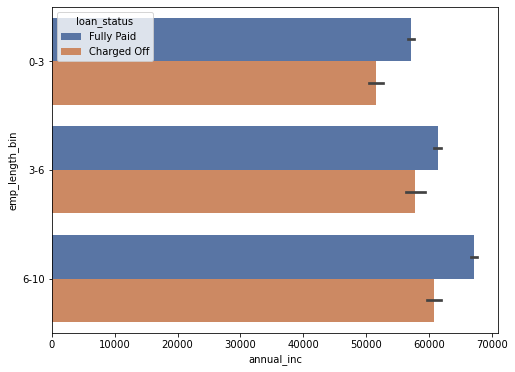

In [205]:
#annual_inc and emp_length
plt.figure(figsize=(8,6))
sns.barplot(data =loan_data,x='annual_inc', y='emp_length_bin', hue ='loan_status',palette="deep")
plt.show()

In [ ]:
##COnclusion
# The applicants having the annual income of around 60k with work experience of 6 to 10 years are likely to default more

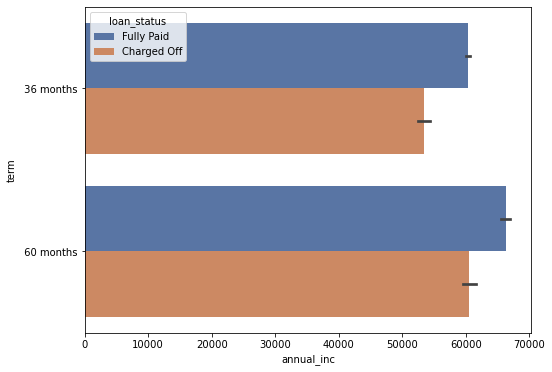

In [206]:
#annual_inc and term
plt.figure(figsize=(8,6))
sns.barplot(data =loan_data,x='annual_inc', y='term', hue ='loan_status',palette="deep")
plt.show()

In [ ]:
##Conclusion
#The applicants having the annual income of around 60k with loan term of 60 months are likely to default more

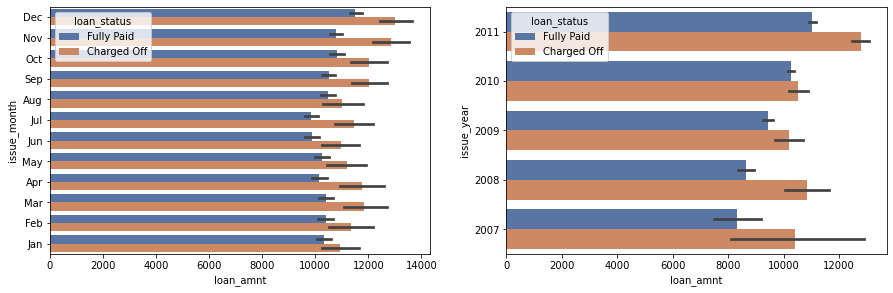

In [210]:
##Now lets analyse loan amount with month and year of issue
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.barplot(data =loan_data,x='loan_amnt', y='issue_month', hue ='loan_status',palette="deep")
plt.subplot(222)
sns.barplot(data =loan_data,x='loan_amnt', y='issue_year', hue ='loan_status',palette="deep")
plt.show()

In [211]:
##Conclusion
# The applicants who are sanctioned the loan amount of around 12k to 14k in month of Nov and Dec and year 2011 have defaulted more

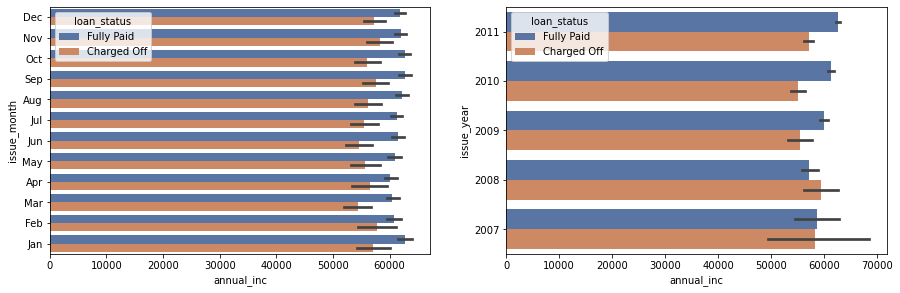

In [213]:
##Now lets analyse loan amount with month and year of issue
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.barplot(data =loan_data,x='annual_inc', y='issue_month', hue ='loan_status',palette="deep")
plt.subplot(222)
sns.barplot(data =loan_data,x='annual_inc', y='issue_year', hue ='loan_status',palette="deep")
plt.show()

In [214]:
##Conclusion
# The applicants who have the annual income between 50k to 60k and loan being sanctioned in the months of Nov, Dec, Jan and Feb
#have defaulted more

In [ ]:
##Observations

#Based on above analysis there are more possibilities of defaulting with the below mentioned criteria
#1) The applicants who are in the annual income bin of 112k to 140k with the loan amount between 17k and 20k 
#2) The applicants with the interest rate of 21% to 24% with the loan amount of nearly 20k 
#3) The applicants having the installment of 1000 to 1400 with loan amount of nearly 35k 
#4)The applicants having the annual income of around 70k with interest rate of 21 to 24% 
#5) The applicants having the annual income of around 70k with mortgage house 
#6)The applicants having the annual income of around 60k with work experience of 6 to 10 years 
#7)The applicants having the annual income of around 60k with loan term of 60 months 
#8) The applicants who are sanctioned the loan amount of around 12k to 14k in month of Nov and Dec and year 2011 
#9)The applicants who have the annual income between 50k to 60k and loan being sanctioned in the months of Nov, Dec, Jan and Feb


